In this notebook I will explore the Vancouver Police Department's crime statistics from 2003 to 2019 to see if any patterns emerge. I will see if the most common crimes are changing and if overall crime is increasing or decreasing each year. I will also see if there are clear patterns for time of year, time of day, or neighbourhood that crimes are committed in.

### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Loading Data

In [2]:
crime_data = pd.read_csv('crime_records.csv')

In [3]:
crime_data.head()

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y
0,Break and Enter Commercial,2012,12,14,8,52,NaN,Oakridge,491285.000000,5.453433e+06
1,Break and Enter Commercial,2019,3,7,2,6,10XX SITKA SQ,Fairview,490612.964805,5.457110e+06
2,Break and Enter Commercial,2019,8,27,4,12,10XX ALBERNI ST,West End,491007.779775,5.459174e+06
3,Break and Enter Commercial,2014,8,8,5,13,10XX ALBERNI ST,West End,491015.943352,5.459166e+06
4,Break and Enter Commercial,2005,11,14,3,9,10XX ALBERNI ST,West End,491021.385727,5.459161e+06


In [4]:
crime_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 624038 entries, 0 to 624037
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TYPE           624038 non-null  object 
 1   YEAR           624038 non-null  int64  
 2   MONTH          624038 non-null  int64  
 3   DAY            624038 non-null  int64  
 4   HOUR           624038 non-null  int64  
 5   MINUTE         624038 non-null  int64  
 6   HUNDRED_BLOCK  624025 non-null  object 
 7   NEIGHBOURHOOD  559076 non-null  object 
 8   X              623918 non-null  float64
 9   Y              623918 non-null  float64
dtypes: float64(2), int64(5), object(3)
memory usage: 47.6+ MB


### Data Cleaning

I only need one indicator of location and neighbourhood seems the simplest to draw conclusions with, so I will drop the columns for hundred block and the x and y gps co-ordinates. I don't need to know the time down to the minute so I will drop that column, hour will suffice for determining time of day. Lastly I will drop the day of the month. If I were to spend more time with this dataset I could probably convert that column to day of the week but that would be more intensive data cleaning than I would like for this project.

In [5]:
crime_data.drop(columns='DAY', inplace=True)
crime_data.drop(columns='MINUTE', inplace=True)
crime_data.drop(columns='HUNDRED_BLOCK', inplace=True)
crime_data.drop(columns='X', inplace=True)
crime_data.drop(columns='Y', inplace=True)

In [6]:
crime_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 624038 entries, 0 to 624037
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   TYPE           624038 non-null  object
 1   YEAR           624038 non-null  int64 
 2   MONTH          624038 non-null  int64 
 3   HOUR           624038 non-null  int64 
 4   NEIGHBOURHOOD  559076 non-null  object
dtypes: int64(3), object(2)
memory usage: 23.8+ MB


I will now drop the rows that are missing entries for neighbourhood

In [7]:
crime_data = crime_data[crime_data['NEIGHBOURHOOD'].notna()]

In [8]:
crime_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 559076 entries, 0 to 624037
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   TYPE           559076 non-null  object
 1   YEAR           559076 non-null  int64 
 2   MONTH          559076 non-null  int64 
 3   HOUR           559076 non-null  int64 
 4   NEIGHBOURHOOD  559076 non-null  object
dtypes: int64(3), object(2)
memory usage: 25.6+ MB


### Exploring Data

My dataset is now clean so I can begin exploring it. I will begin by determining the 5 most common crimes in 2003 and in 2019 to see if they have changed.

In [9]:
print(crime_data.loc[crime_data['YEAR']==2003].TYPE.value_counts()[:5])
print(crime_data.loc[crime_data['YEAR']==2019].TYPE.value_counts()[:5])

Theft from Vehicle                   17287
Break and Enter Residential/Other     6883
Theft of Vehicle                      6352
Mischief                              6351
Break and Enter Commercial            3197
Name: TYPE, dtype: int64
Theft from Vehicle            14819
Mischief                       4989
Other Theft                    4866
Theft of Bicycle               1982
Break and Enter Commercial     1964
Name: TYPE, dtype: int64


It appears that theft from vehicle is still the most common crime while break and enter commercial and mischief are still in the top 5, but other theft and theft of bicycle have overtaken break and enter residential/other and theft of vehicle.

I will now see if the total numbers of crimes reported are changing year over year

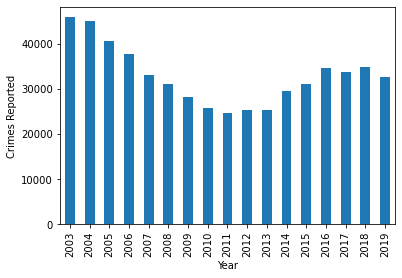

In [10]:
crime_data['YEAR'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Crimes Reported')
plt.show()

So it appears crime rates descended each year until 2011 at which point they began rising again. Next I will see if there is a pattern as to what time of year crimes are committed

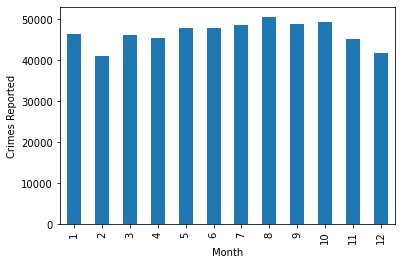

In [13]:
crime_data['MONTH'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Crimes Reported')
plt.show()

So it appears that crime rate peaks in August with a smaller bump in crime in January while February and December are low periods. Next I will see if time of day has an impact on crime. I suspect that crime rates are higher at night due to lower risk of getting caught.

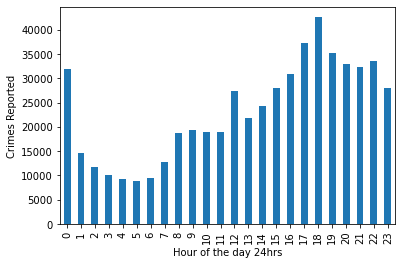

In [14]:
crime_data['HOUR'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Hour of the day 24hrs')
plt.ylabel('Crimes Reported')
plt.show()

I was wrong. Crime seems to spike in the late afternoon with a smaller spike at midnight before dropping off sharply in the early morning. This suggests that most crimes are reported as people are coming home from work or school. Perhaps this is due to a delay in victims noticing and reporting the crimes. 

Lastly I will check to see if certain neighbourhoods are worse for crime.

In [16]:
crime_data['NEIGHBOURHOOD'].unique()

array(['Oakridge', 'Fairview', 'West End', 'Central Business District',
       'Hastings-Sunrise', 'Strathcona', 'Grandview-Woodland',
       'Kitsilano', 'Kensington-Cedar Cottage', 'Sunset',
       'Mount Pleasant', 'Stanley Park', 'Shaughnessy', 'Marpole',
       'West Point Grey', 'Victoria-Fraserview', 'Kerrisdale',
       'Riley Park', 'Arbutus Ridge', 'Renfrew-Collingwood', 'Killarney',
       'Dunbar-Southlands', 'South Cambie', 'Musqueam'], dtype=object)

In [15]:
crime_data['NEIGHBOURHOOD'].value_counts()

Central Business District    137513
West End                      48722
Fairview                      36723
Mount Pleasant                36378
Grandview-Woodland            31599
Renfrew-Collingwood           31097
Kitsilano                     30670
Kensington-Cedar Cottage      28418
Strathcona                    25809
Hastings-Sunrise              21272
Sunset                        19686
Marpole                       15137
Riley Park                    14663
Victoria-Fraserview           12310
Killarney                     11847
Oakridge                       9281
Dunbar-Southlands              8792
Kerrisdale                     8470
Arbutus Ridge                  6819
West Point Grey                6761
Shaughnessy                    6321
South Cambie                   6043
Stanley Park                   4174
Musqueam                        571
Name: NEIGHBOURHOOD, dtype: int64

<AxesSubplot:>

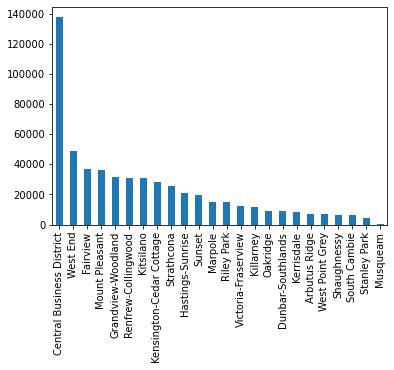

In [18]:
crime_data['NEIGHBOURHOOD'].value_counts().plot(kind='bar')

The Central Business District experiences over 180% more crime than any other neighbourhood. Given this striking difference I think it will be useful to know specifically what crimes are most common there so I will check that.

<AxesSubplot:>

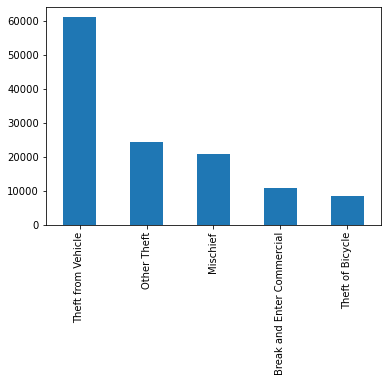

In [19]:
crime_data.loc[crime_data['NEIGHBOURHOOD']=='Central Business District'].TYPE.value_counts()[:5].plot(kind='bar')

So the most common crime by a wide margin in the central business district is theft from vehicle. Given what I learned about the time of day crimes are reported, I think this may indicate that the most common crime in Vancouver is that criminals are breaking into people's cars while they are at work and the victims notice as they are preparing to head home. Given this theory, it would be interesting to compare the data for annual crimes with the unemployment rates for the years where crime was lowest as the low point occurs shortly after the 2008 financial crisis and this may have had an impact on this particular type of crime.